# GRN between Cell Types

This Notebook is part of the Bachelorthese from David Wild.

The goal of this notebook is to find out gene-gene interactions between different cell types. We want as a result a GRN that not only describes which genes express which, but also how much (weighted graph) and in which direction (exhibiting, inhibiting).  
Another aspect that would be interesting are finding co-factors.


In [ ]:
import shutil


# Check if this gets executed in google colab.
# If so, then we need to install pip packages and clone the repo and data
try:
    import google.colab
except ImportError:
    IN_COLAB = False
else:
    IN_COLAB = True


if IN_COLAB:
    !git clone https://github.com/DavidWild02/BachelorThesis-ML-Gene-Interactions.git
    %cd ./BachelorThesis-ML-Gene-Interactions

    # copy data from drive folder.
    from google.colab import drive
    drive.mount('/content/drive')
    shutil.copytree("/content/drive/MyDrive/DavidWildBachelorthesis/data", "./data", dirs_exist_ok=True)

# install packages manually, because IPython and others cannot be installed, because that crashes the runtime
!pip install matplotlib numpy pandas seaborn anndata scanpy torch scikit-learn scipy tqdm

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
from IPython.display import display

adata = sc.read_h5ad("./data/subdom_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 2671 × 13144
    obs: 'n_genes_by_counts', 'total_counts', 'clusters', 'ct_num_exp_genes', 'ct_score', 'ct_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ct_gene_corr', 'ct_correlates'
    uns: 'clusters_colors', 'clusters_sizes', 'ct_params', 'hvg', 'leiden', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'log_tpm', 'spliced', 'tpm', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
adata.to_df().head()

,SUB2.g1,SUB2.g2,SUB2.g3,SUB2.g4,SUB2.g5,SUB2.g6,SUB2.g7,SUB2.g8,SUB2.g9,SUB2.g10,...,SUB2.g13135,SUB2.g13136,SUB2.g13137,SUB2.g13138,SUB2.g13139,SUB2.g13140,SUB2.g13141,SUB2.g13142,SUB2.g13143,SUB2.g13144
AAACCCAAGGACAGCT-1,0.009687,-1.032545,-1.566363,1.018223,-0.933981,-0.410398,-0.349553,-0.444472,-0.132447,-0.567418,...,0.0,0.0,0.0,-0.293056,0.0,0.0,0.0,0.0,-0.365098,-0.652811
AAACCCAAGGGTTTCT-1,1.598354,-0.300789,-0.202161,-0.002592,0.181964,0.269252,-0.393041,0.037609,0.115123,-0.754939,...,0.0,0.0,0.0,-0.192047,0.0,0.0,0.0,0.0,-0.296943,-0.677305
AAACCCACAAATGGTA-1,-0.777102,-0.792809,-1.281675,1.262175,-0.185155,-0.726397,-0.455605,-0.671795,-0.448440,-0.868259,...,0.0,0.0,0.0,-0.315716,0.0,0.0,0.0,0.0,-0.205751,0.327006
AAACCCATCGAGAAGC-1,0.696619,-0.306533,0.700373,-1.587061,-0.054666,0.263420,-0.105024,0.250046,0.661372,-0.186924,...,0.0,0.0,0.0,-0.300775,0.0,0.0,0.0,0.0,-0.310817,-0.878208
AAACCCATCTTGTTAC-1,-1.319795,-1.191836,-1.658409,1.626106,-0.142163,-1.176196,-0.391015,-0.537126,-0.254368,-0.777899,...,0.0,0.0,0.0,-0.301799,0.0,0.0,0.0,0.0,-0.303617,-0.420889


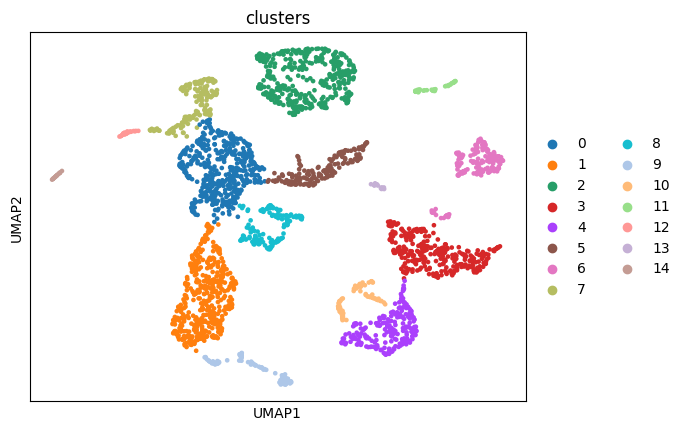

In [7]:
sc.pl.umap(adata, color="clusters")

/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/plotting.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clusters = adata.to_df().groupby(cluster_indices, as_index=True)


,mean,variance,count
0,0.854147,0.303738,453
1,-0.571310,0.124944,434
2,0.082253,0.282678,389
3,-0.970866,0.055405,306
4,-0.812502,0.006894,213
5,0.580866,0.581075,169
6,-0.394426,0.307595,169
7,1.720971,0.334073,151
8,0.054213,0.282651,139
9,-0.078863,0.663402,82


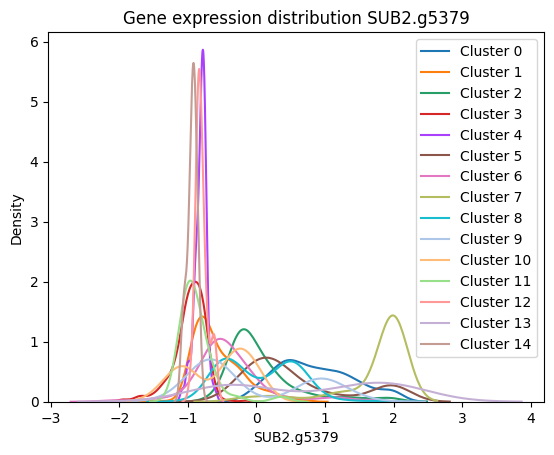

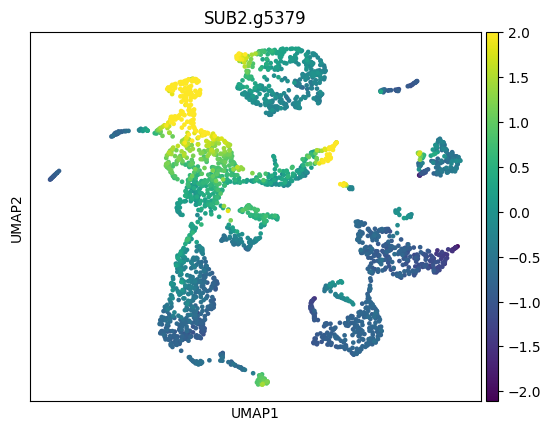

In [ ]:
from plotting import calculate_cluster_statistics_for_gene, display_gene_expression_distribution


def plot_gene_cell_group_statistics(adata, gene):
    cell_group_statistics = calculate_cluster_statistics_for_gene(adata, gene)
    display(cell_group_statistics)
    display_gene_expression_distribution(adata, gene, by_cluster=True)
    sc.pl.umap(adata, color=gene, use_raw=False)

example_gene = "SUB2.g5379"
plot_gene_cell_group_statistics(adata, example_gene)

# Assumption of normality in groups

We assume that the gene expression levels are non-stationary (varying mean and variance across pseudo time / cell types), but we assume also that for cell types, the expression levels are stationary and follow a simple gaussian distribution. As we see from the plot, for our example gene this holds. 

We can also see that for some groups, it does not hold, those need probably to be splitted up further into subgroups.

For evaluating how well the assumption of normality fits for each gene and each cell-group, we will use the lillieforth test to compute the p-value.

In [15]:
import statsmodels.api as sm

def calculate_lilliefors(adata):
    df_genes = adata.to_df()

    cluster_indices = adata.obs["clusters"].values
    num_clusters = len(adata.uns["clusters_colors"])
    cluster_pvalues = np.zeros((num_clusters, len(df_genes.columns)))
    for cluster_index in range(num_clusters):
        cluster_data = df_genes.loc[cluster_indices == str(cluster_index), :]

        for gene_index, gene in enumerate(cluster_data.columns):
            ksstat, pvalue = sm.stats.diagnostic.lilliefors(cluster_data[gene])
            cluster_pvalues[cluster_index, gene_index] = pvalue
    return pd.DataFrame(cluster_pvalues, index=range(num_clusters), columns=df_genes.columns)

In [16]:
clusters_normality_pvalue = calculate_lilliefors(adata)
display(clusters_normality_pvalue)

/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/.venv/lib/python3.12/site-packages/statsmodels/stats/_lilliefors.py:279: RuntimeWarning: invalid value encountered in divide
  z = (x - x.mean()) / x.std(ddof=1)


,SUB2.g1,SUB2.g2,SUB2.g3,SUB2.g4,SUB2.g5,SUB2.g6,SUB2.g7,SUB2.g8,SUB2.g9,SUB2.g10,...,SUB2.g13135,SUB2.g13136,SUB2.g13137,SUB2.g13138,SUB2.g13139,SUB2.g13140,SUB2.g13141,SUB2.g13142,SUB2.g13143,SUB2.g13144
0,0.004601,0.002743,0.006566,0.242825,0.001000,0.002511,0.001000,0.001000,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000
1,0.130639,0.512709,0.001000,0.001000,0.001000,0.001000,0.001000,0.001887,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000
2,0.002886,0.001000,0.524388,0.001000,0.023807,0.001000,0.001000,0.001000,0.001000,0.009740,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001992
3,0.240335,0.001000,0.001000,0.001000,0.313909,0.001000,0.001000,0.001000,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000
4,0.001000,0.001000,0.001000,0.209763,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000
5,0.001000,0.001000,0.020406,0.001000,0.001000,0.914232,0.001000,0.001000,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000
6,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.911077,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.375849
7,0.001000,0.002359,0.237396,0.092158,0.001000,0.001000,0.001000,0.002842,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.156432
8,0.493888,0.001000,0.040306,0.046204,0.001000,0.050056,0.001000,0.001000,0.001000,0.034775,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.220040
9,0.001000,0.089587,0.001000,0.001000,0.001000,0.001000,0.001000,0.010033,0.001000,0.001000,...,NaN,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,0.001000,0.001000


/home/atr0x/Documents/UNI/WS2025/BachelorArbeit/GAE-gene-interactions/plotting.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clusters = adata.to_df().groupby(cluster_indices, as_index=True)


,mean,variance,count
0,0.634178,0.577863,453
1,-0.377893,0.146975,434
2,0.373459,0.666963,389
3,-0.778872,0.087717,306
4,-1.064612,0.031065,213
5,0.359558,0.324475,169
6,-0.544254,0.279205,169
7,1.411065,0.431124,151
8,-0.301782,0.322829,139
9,-0.136745,1.608485,82


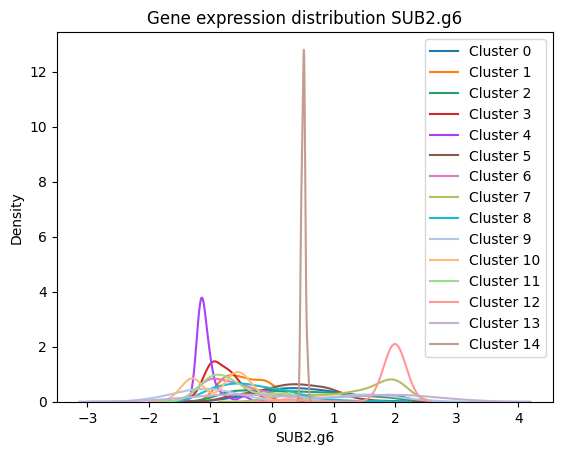

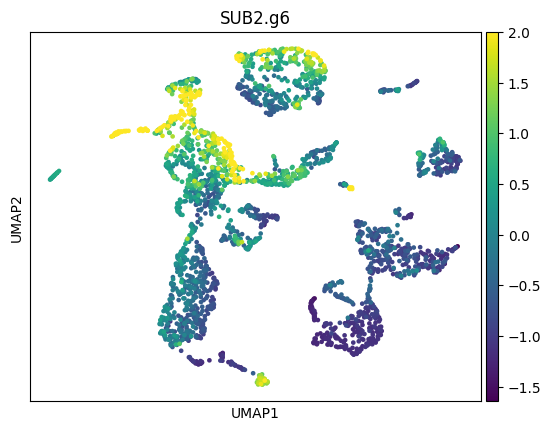

In [18]:
example_gene = "SUB2.g6"
plot_gene_cell_group_statistics(adata, example_gene)

As we can see, the assumption of gaussianity does not hold for our clusters. This could also mean the clusters are not that good.

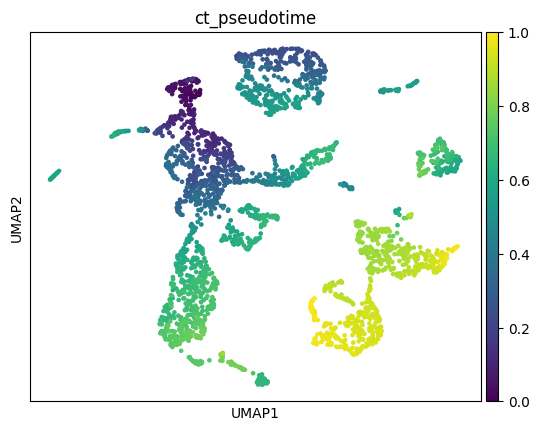

: 

: 

In [ ]:
sc.pl.umap(adata, color="ct_pseudotime")

In the data set the data is already preprocessed, clustered and also the pseudo-time was calculated on it. The pseudo-time is a time approximation, measured on how specified the cell is in terms of how many genes are expressed. The idea is that more specialized cells have fewer expressed genes.

We already have a GRN, but it is global, we would prefer a single GRN for each cell-type to cell-type transition. Also we want a weighted GRN and the GRN at the moment is a binary matrix.
One method to construct such GRNs is by just using a Masked Linear Regression. The weight matrix of this linear regression would then be the adjacency matrix of the GRN.

To look if the approach is feasible at all, we will first only do that for stem cells (cluster 7) to transition cells (cluster 0).  
After that we validate how well prediction is (accuracy, residual plot) and how well the GRN correlates to existing knowledge.
Also how non linear models like Neural networks perform in comparison.

In [ ]:
#  load data global GRN
df_grn = pd.read_csv("./data/transcription_factor_adjacency_matrix.csv", index_col="gene_ids")
print("transcription factor adjacency matrix")
df_grn = df_grn.transpose()

# This approach seemed to make no real difference
#
# # index = target gene, column = transcription factors
# # We want to ensure here, that every gene can be influenced by itself
# target_genes = df_grn_original.index
# transcription_genes = df_grn_original.columns.union(target_genes)
# df_grn = pd.DataFrame(np.zeros((len(target_genes), len(transcription_genes))), 
#                       columns=transcription_genes, 
#                       index=target_genes)
# df_grn.loc[df_grn_original.index, df_grn_original.columns] = df_grn_original
# for i in df_grn.index:
#     df_grn.loc[i, i] = 1.
df_grn.head()

transcription factor adjacency matrix


gene_ids,SUB2.g1,SUB2.g2,SUB2.g11,SUB2.g16,SUB2.g18,SUB2.g21,SUB2.g22,SUB2.g26,SUB2.g27,SUB2.g31,...,SUB2.g12978,SUB2.g12979,SUB2.g12980,SUB2.g13052,SUB2.g13056,SUB2.g13090,SUB2.g13093,SUB2.g13119,SUB2.g13123,SUB2.g13134
SUB2.g8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUB2.g231,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
SUB2.g755,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
SUB2.g902,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
SUB2.g924,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1


: 

: 

The Linear Regression should take samples from cluster A and predict samples in cluster B. The mappings a->b are sampled randomly.  
Of course this approach could be enhanced with other techniques, that search for a better mapping. Like Optimal Transport for example.

In [ ]:
np.random.seed(42) # set seed to make reproducible outputs

: 

: 

In [ ]:
from itertools import islice
from sklearn.model_selection import GridSearchCV
from MaskedRidgeRegressor import MaskedRidgeRegressor
from sampling import RandomMappingSampler

# TODO: let num_samples also be a float. in that case it should sample a percentage of all possible associations a*b
def sample_associations(samples_cluster_a: pd.DataFrame, samples_cluster_b: pd.DataFrame, 
                        sampler, num_samples=1000, **kwargs):

    # TODO: instead of sampling everything directly, sample step by step and add it and check for duplicates
    sample_indices = list(islice(iter(sampler), num_samples))
    
    sample_indices_unique = []
    for indices in sample_indices:
        if indices not in sample_indices_unique:
            sample_indices_unique.append(indices)

    sample_indices_a = list(map(lambda x: x[0], sample_indices_unique))
    sample_indices_b = list(map(lambda x: x[1], sample_indices_unique))

    X = samples_cluster_a.iloc[sample_indices_a]
    y = samples_cluster_b.iloc[sample_indices_b]

    return X, y

def train_model_for_cluster_to_cluster_association(
        x: pd.DataFrame, y: pd.DataFrame,
        mask_grn: np.ndarray, param_grid = {}, **kwargs):
    
    model = MaskedRidgeRegressor(mask_grn, epochs=250, lr=0.1, **kwargs)
    grid_search = GridSearchCV(model, param_grid, cv=4)
    grid_search.fit(x.to_numpy(), y.to_numpy())
    best_estimator = grid_search.best_estimator_
    print("best parameters:", grid_search.best_params_)
    print("best score:", grid_search.best_score_)

    return best_estimator


: 

: 

In [ ]:
def extract_samples_of_cell_cluster(adata, cluster_id: str) -> pd.DataFrame:
    obs_mask_cell_cluster = adata.obs["clusters"].values == cluster_id
    samples_cell_cluster = adata.X[obs_mask_cell_cluster, :]
    df_stem_cells = pd.DataFrame(samples_cell_cluster,
                                        index=adata.obs_names[obs_mask_cell_cluster],
                                        columns=adata.var_names)
    return df_stem_cells

stem_cells_cluster_id = '7'
transition_cells_cluster_id = '0'


df_stem_cells = extract_samples_of_cell_cluster(adata, stem_cells_cluster_id)
df_transition_cells = extract_samples_of_cell_cluster(adata, transition_cells_cluster_id)

# We only want those transcription factors and target genes, that are included in the grn
df_stem_cells = df_stem_cells[df_grn.index]
df_transition_cells = df_transition_cells[df_grn.columns]

print(f"Shape of stem cells: {df_stem_cells.shape}")
print(f"Shape of transition cells: {df_transition_cells.shape}")

Shape of stem cells: (151, 68)
Shape of transition cells: (453, 5582)


: 

: 

In [ ]:
sampler = RandomMappingSampler(df_stem_cells, df_transition_cells)
x_samples, y_samples = sample_associations(df_stem_cells, df_transition_cells, sampler, num_samples=2000)

TRAIN_TEST_SPLIT_PERCENTAGE = 0.3
train_test_split_index = int(len(y_samples) * TRAIN_TEST_SPLIT_PERCENTAGE)
x_train= x_samples.iloc[:-train_test_split_index]
y_train= y_samples.iloc[:-train_test_split_index]
x_test= x_samples.iloc[-train_test_split_index:]
y_test= y_samples.iloc[-train_test_split_index:]

print(f"Num training samples: {len(x_train)}")
print(f"Num testing samples: {len(x_test)}")

Num training samples: 1381
Num testing samples: 591


: 

: 

To validate how good the regression model explains the data we use the R2-Score.

$$
R^2 = 1 - \frac{\sum{\left( y - \hat{y} \right)^2}}{\sum{\left( y - \overline{y} \right)^2}}
$$

The R2-Score can range from 1 to -1:
- 1 means that the model predicts perfectly the data.
- 0 means the model does not better than predicting the average
- -1 means the model does worse than predicting the average

From the output below we can see, that the regression for most genes outputs a R2-score of nearly 0. That means our model predicts the average. This was as expected, because we randomly sample associations between X and y. So which cells of A (stem cells) "evolve" to cells of B (transition cells).

Some genes have a very bad score (negative). This means that probably some explanatory variables are missing or that the relationship is non linear. 

In [ ]:
from sklearn.metrics import r2_score
from plotting import show_score_distribution, display_gene_residual_plots

def calculate_genes_r2_score(y: pd.DataFrame, y_pred: pd.DataFrame) -> pd.DataFrame:
    genes_r2_score = [ r2_score(y.iloc[:, i], y_pred.iloc[:, i]) for i in range(y.shape[1])]

    genes_r2_score = np.array([genes_r2_score]).T
    df_gen_scores = pd.DataFrame(genes_r2_score, index=y.columns, columns=["r2_score"])
    df_gen_scores = df_gen_scores.sort_values(by="r2_score", ascending=False)

    return df_gen_scores

def experiment_report(y: pd.DataFrame, y_pred: pd.DataFrame):
    overall_r2_score = r2_score(y, y_pred)
    print(f"r2 score for overall prediction: {overall_r2_score}")

    df_gen_scores = calculate_genes_r2_score(y, y_pred)
    show_score_distribution(df_gen_scores, "r2_score")

    display(df_gen_scores.head(3))
    display(df_gen_scores.tail(3))

    display_gene_residual_plots(y, y_pred, df_gen_scores.head(3).index)
    display_gene_residual_plots(y, y_pred, df_gen_scores.tail(3).index)

: 

: 

In [ ]:

grn_mask = df_grn.values
model = train_model_for_cluster_to_cluster_association(x_train, y_train, grn_mask)
y_pred = model.predict(x_test.values)
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)
experiment_report(y_test, y_pred)

Epoch 21:   8%|▊         | 21/250 [00:00<00:08, 26.18it/s, loss=0.65] 


KeyboardInterrupt: 

: 

: 

As we can see the overall R2-Score for the whole data is -0.3. So the model performs worse than predicting the average. When we then look at the distribution of the r2-Scores for each single gene, we can see that the model actually is not that bad, but instead only for some single genes, that have a highly negative r2-score.  
From the residual plots and prediction error plots we can interpret that for those genes a variable is probably missing. I came to this conclusion, because the "predicted vs actual" plots show that for a more or less constant value, the model seems sto randomly make predictions. So it is not capable of making correct predictions by using the known variables.

In the next section I will repeat the experiment, but now by including a bias term for the Masked linear regression model. With that it performs better, because it "replaces" the missing variables for predicting the mean.

In [ ]:
# df_gen_scores = calculate_genes_r2_score(y_test, y_pred)
# df_bad_gen_scores = df_gen_scores[df_gen_scores["r2_score"] < -0.5]

# y_train = y_train.drop(columns=df_bad_gen_scores.index)
# y_test = y_test.drop(columns=df_bad_gen_scores.index)

# grn_mask = df_grn.drop(columns=df_bad_gen_scores.index).values

# percentage_bad_genes = int(len(df_bad_gen_scores) / len(df_gen_scores) * 100)
# print(f"percentage bad genes: {percentage_bad_genes}%")

# display(df_bad_gen_scores)

: 

: 

In [ ]:

# model = train_model_for_cluster_to_cluster_association(x_train, y_train, grn_mask)
# y_pred = model.predict(x_test.values)
# y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)
# experiment_report(y_test, y_pred)

: 

: 

Now the main problem of the approach is that random sampling will lead to the model only predicting the mean, because there are no meaningful associations (they are random) and so no underlying pattern to learn.  

Now I will try out to include pseudo time data into the data, so that the regression model gets as input X not only the genes of cell A but also the pseudo time of A and the pseudo time of the target cell B. The output y stays the same, it will be the expression values for the genes of B.

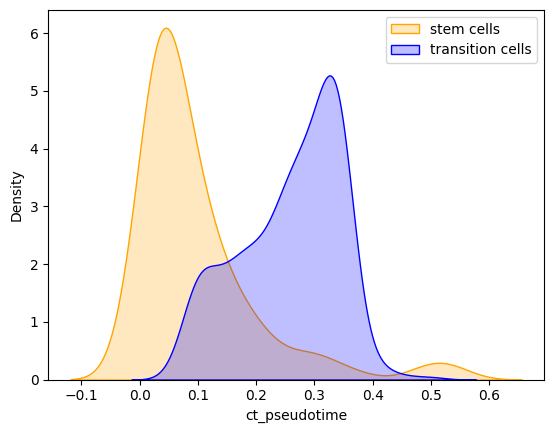

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pseudo_time_stem_cells = adata.obs["ct_pseudotime"][df_stem_cells.index]
df_pseudo_time_transition_cells = adata.obs["ct_pseudotime"][df_transition_cells.index]

sns.kdeplot(df_pseudo_time_stem_cells, color="orange", fill=True, label="stem cells")
sns.kdeplot(df_pseudo_time_transition_cells, color="blue", fill=True, label="transition cells")
plt.legend(loc="upper right")

In the next block I create a new training and testing dataframe for the input values x. I inject in those the pseudo time of the target cell and the "source" cell. Also I have to add two new rows to the GRN-mask, so that the shape matches.

In [ ]:
x_train_pt = x_train.copy() # copy to ensure, that original does not get modified
x_train_pt["pseudo_time"] = df_pseudo_time_stem_cells.loc[x_train.index].values
x_train_pt["target_pseudo_time"] = df_pseudo_time_transition_cells.loc[y_train.index].values

x_test_pt = x_test.copy()
x_test_pt["pseudo_time"] = df_pseudo_time_stem_cells.loc[x_test.index].values
x_test_pt["target_pseudo_time"] = df_pseudo_time_transition_cells.loc[y_test.index].values

one_vector = np.ones(grn_mask.shape[1])
grn_mask_pt = np.vstack([grn_mask, one_vector, one_vector])

: 

: 

Epoch 1:   0%|          | 0/250 [00:00<?, ?it/s, loss=7.94]

Epoch 249: 100%|██████████| 250/250 [00:10<00:00, 24.42it/s, loss=0.291]


best parameters: {}
best score: -0.21873386204242706
r2 score for overall prediction: -0.21314192058332004


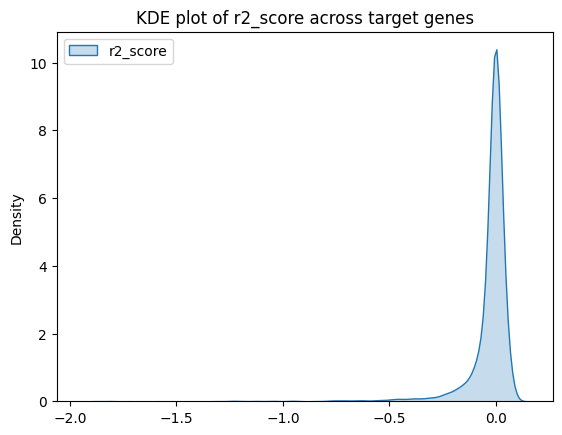

,r2_score
SUB2.g2135,0.092690
SUB2.g5013,0.092556
SUB2.g922,0.087343


,r2_score
SUB2.g12623,-17.826252
SUB2.g10238,-186.025040
SUB2.g4797,-667.891174


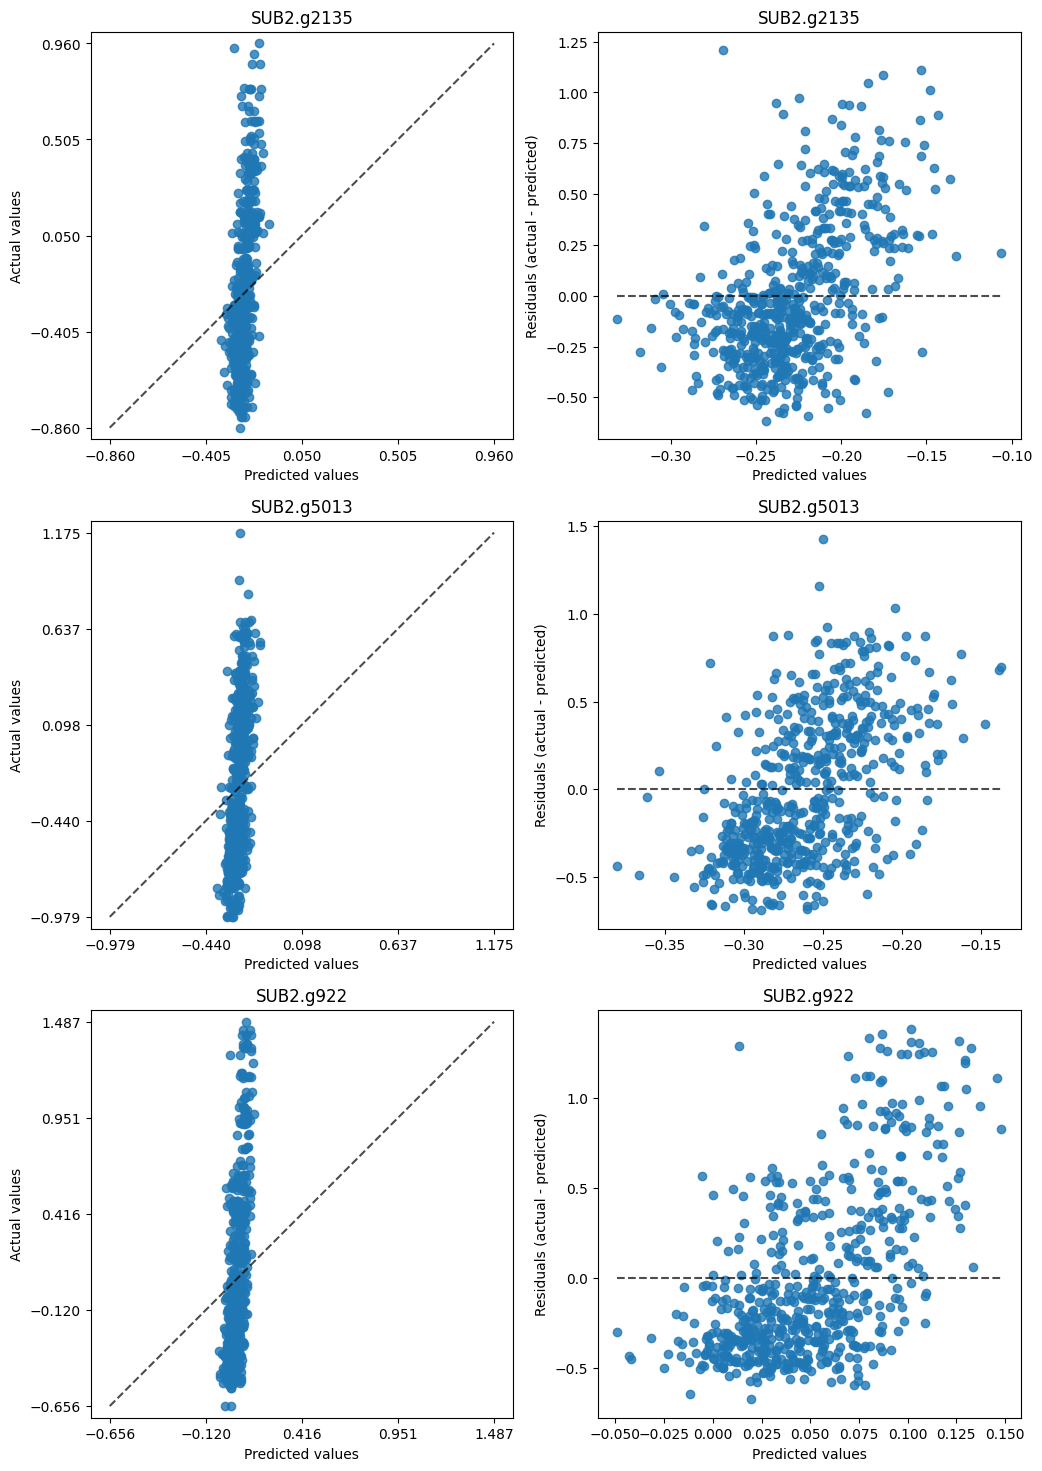

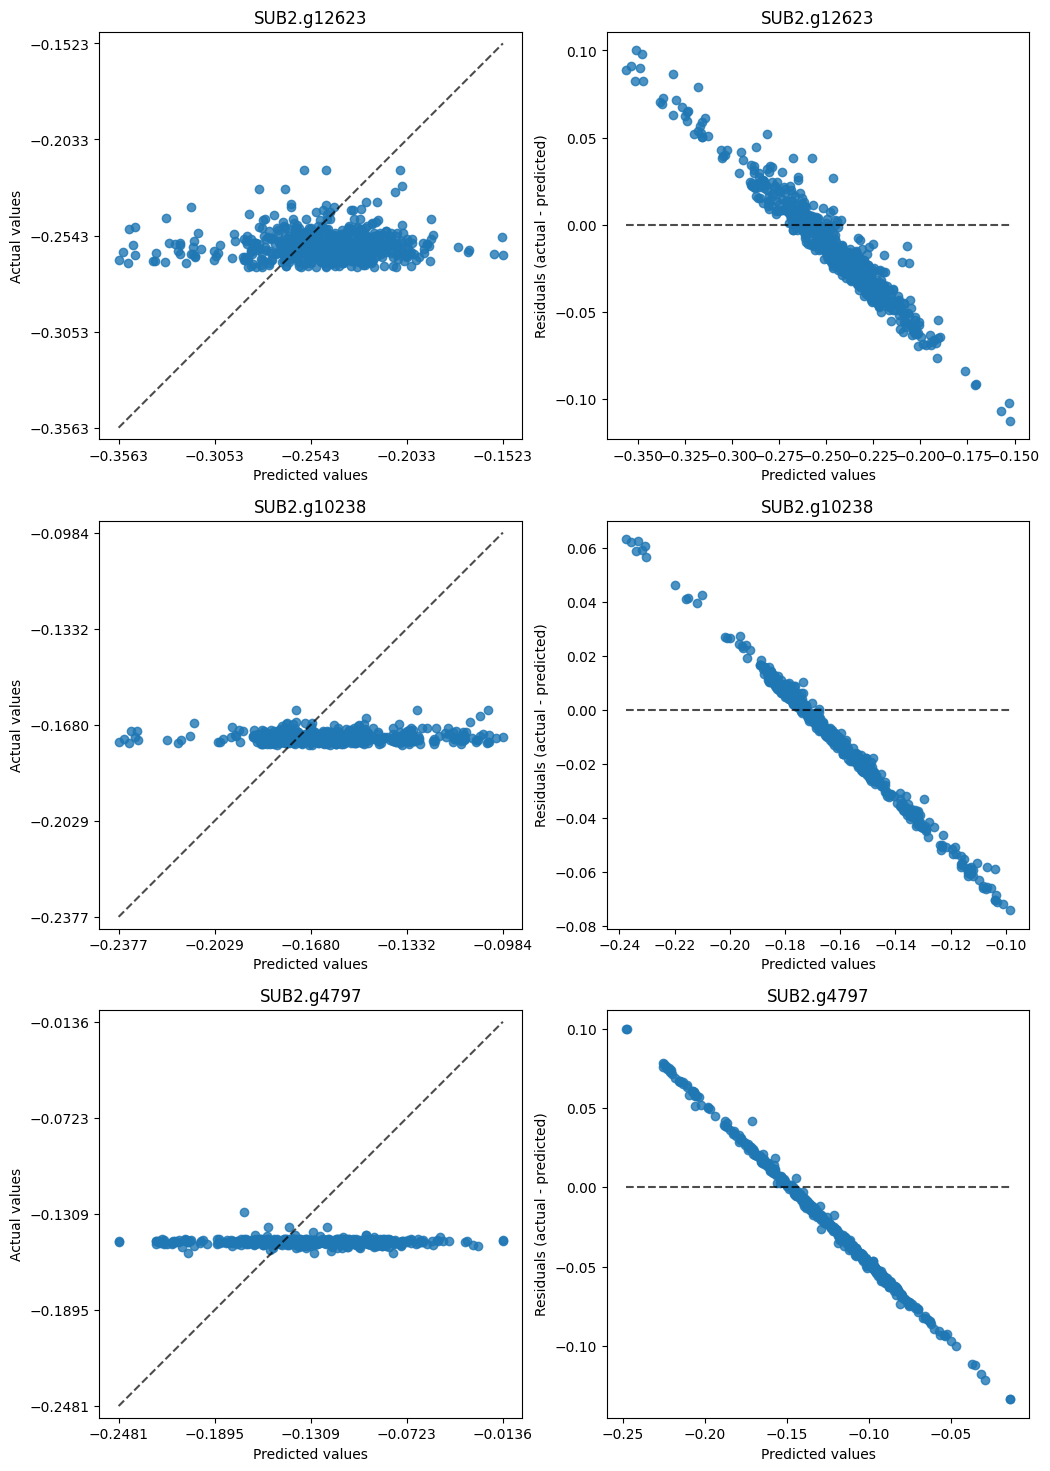

: 

: 

In [ ]:
model = train_model_for_cluster_to_cluster_association(
    x_train_pt, y_train, grn_mask_pt)

y_pred_pt = model.predict(x_test_pt)
y_pred_pt = pd.DataFrame(y_pred_pt, index=y_test.index, columns=y_test.columns)
experiment_report(y_test, y_pred_pt)

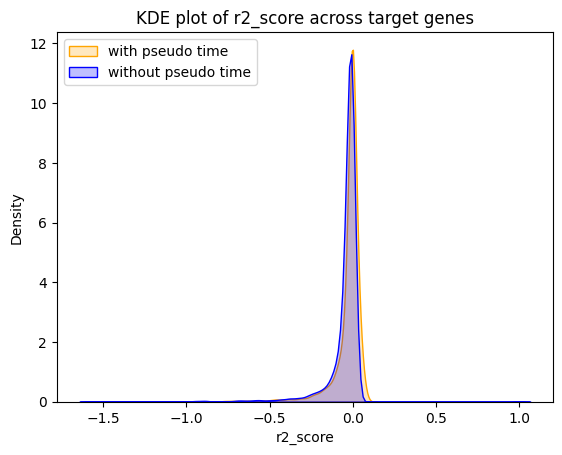

: 

: 

In [ ]:
# We dismiss the last 5% genes, to have a nicer looking plot without the outliers
outlier_percentage = 0.075
index = int(len(y_test) * outlier_percentage)
gene_scores_pt = calculate_genes_r2_score(y_test, y_pred_pt).iloc[:-index, :]
gene_scores = calculate_genes_r2_score(y_test, y_pred).iloc[:-index, :]

plt.title(f"KDE plot of r2_score across target genes")
sns.kdeplot(gene_scores_pt, x="r2_score", color="orange", fill=True, label="with pseudo time") # this works not
sns.kdeplot(gene_scores, x="r2_score", color="blue", fill=True, label="without pseudo time")
plt.legend()

approach - "time-distance" weighted random sampling for probability

Instead of this I opted for directly including pseudo-time into the data set. It is easier, adds more information and also has no meta parameter to choose.

In [ ]:
# from sampling import WeightedDistanceMappingSampler

# distance = np.abs(df_pseudo_time_stem_cells.mean() - df_pseudo_time_transition_cells.mean())
# variance = (df_pseudo_time_stem_cells.to_numpy().var() + df_pseudo_time_stem_cells.to_numpy().var()) / 2
# delta = 0.1 * np.sqrt(variance)
# sampler = WeightedDistanceMappingSampler(df_pseudo_time_stem_cells.to_numpy(), df_pseudo_time_transition_cells.to_numpy(), distance, variance, delta)
# model = train_model_for_cluster_to_cluster_association(stem_cells_cluster, transition_cell_cluster, grn_mask, sampler=sampler, use_bias=True)
# weighted_grn = model.W_
# df_weighted_grn = pd.DataFrame(weighted_grn, index=df_grn.index, columns=df_grn.columns)
# df_weighted_grn.head()

: 

: 

In [ ]:
# sampler = WeightedDistanceMappingSampler(df_pseudo_time_stem_cells.to_numpy(), df_pseudo_time_transition_cells.to_numpy(), distance, variance, delta)
# X, y = sample_associations(stem_cells_cluster, transition_cell_cluster, sampler, num_samples=100)
# y_pred = model.predict(X)
# df_gen_scores = calculate_genes_r2_score(y, y_pred)

# show_score_distribution(df_gen_scores, "r2_score")

# display(df_gen_scores.head())
# display_gene_residual_plots(y, y_pred, df_gen_scores.head().index, df_grn)

# display(df_gen_scores.tail())
# display_gene_residual_plots(y, y_pred, df_gen_scores.tail().index, df_grn)

: 

: 

# Problems with the current approach

## Random Sampling 

Because of the random sampling approach, there is no real underlying structure to learn. The best the model can do is predicting the mean. But that probably also gives no useful information. When you include a bias term, it sets that to them mean and the weights to zero, to get a r2-score of 0 (the best it can do for random input). Also If you dismiss the bias term, as I did it (no bias term is used in the linear regression), it just needs to have a variable with very low variance, so that it is basically constant. Then it uses that variable by multiplying it with a weight for getting the mean. It does not need to consider the rest of the weights for that. Ridge regression could maybe compensate that a bit.  
Anyways, I think that actually the model cannot even predict the mean for random association sampling actually and the GRN matrix that we get from the weights is probably worthless.  
I need to investigate this, if it is really a problem as I suspect.

With including the pseudo time in the data set I could get slightly better results, but there is still more improvement needed.

A problem is also, that if another sampling technique is used, that constrains the possible associations further, it could occur, that we cannot harvest enough samples needed for training the model. Especially, when we have smaller clusters with only 20 cells.

# Solutions
- Better association sampling:
  - Either by using trajectory inference
  - Other methods like Optimal Transport, that map a distribution on top of another
